In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense

In [2]:
#Traing Dataset
os.listdir('/content/drive/MyDrive/Braintumor/Training')

['notumor', 'meningioma', 'glioma', 'pituitary']

In [3]:
#Testing dataset

os.listdir("/content/drive/MyDrive/Braintumor/Testing")

['pituitary', 'notumor', 'meningioma', 'glioma']

In [4]:
traindata="/content/drive/MyDrive/Braintumor/Training"
X_train=[]
y_train=[]
Categories=['notumor', 'meningioma', 'glioma', 'pituitary']

for i in Categories:
  path=os.path.join(traindata,i)
  # print(path)
  images=os.listdir(path)
 # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    # print(imgpath)
    imgarray=imread(imgpath)
    img_resize=resize(imgarray,(150,150,1))
    X_train.append(img_resize)
    y_train.append(Categories.index(i))

In [5]:
testdata="/content/drive/MyDrive/Braintumor/Testing"
X_test=[]
y_test=[]
Categories=['notumor', 'meningioma', 'glioma', 'pituitary']

for i in Categories:
  path=os.path.join(testdata,i)
  print(path)
  images=os.listdir(path)
 # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    #print(imgpath)
    imgarray=imread(imgpath)
    img_resize=resize(imgarray,(150,150,1))
    X_test.append(img_resize)
    y_test.append(Categories.index(i))

/content/drive/MyDrive/Braintumor/Testing/notumor
/content/drive/MyDrive/Braintumor/Testing/meningioma
/content/drive/MyDrive/Braintumor/Testing/glioma
/content/drive/MyDrive/Braintumor/Testing/pituitary


In [6]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [7]:
X_train.shape

(5529, 150, 150, 1)

In [8]:
y_train.shape

(5529,)

In [9]:
X_test.shape

(1311, 150, 150, 1)

In [10]:
y_test.shape

(1311,)

In [11]:
from keras.layers import Flatten

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))

# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='Softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
56/56 [==============================] - 101s 2s/step - loss: 0.9817 - accuracy: 0.6518
Epoch 2/10
56/56 [==============================] - 101s 2s/step - loss: 0.3622 - accuracy: 0.8678
Epoch 3/10
56/56 [==============================] - 103s 2s/step - loss: 0.2223 - accuracy: 0.9298
Epoch 4/10
56/56 [==============================] - 103s 2s/step - loss: 0.1345 - accuracy: 0.9602
Epoch 5/10
56/56 [==============================] - 103s 2s/step - loss: 0.0819 - accuracy: 0.9803
Epoch 6/10
56/56 [==============================] - 110s 2s/step - loss: 0.0593 - accuracy: 0.9875
Epoch 7/10
56/56 [==============================] - 104s 2s/step - loss: 0.0347 - accuracy: 0.9951
Epoch 8/10
56/56 [==============================] - 103s 2s/step - loss: 0.0232 - accuracy: 0.9976
Epoch 9/10
56/56 [==============================] - 104s 2s/step - loss: 0.0159 - accuracy: 0.9993
Epoch 10/10
56/56 [==============================] - 105s 2s/step - loss: 0.0116 - accuracy: 0.9998


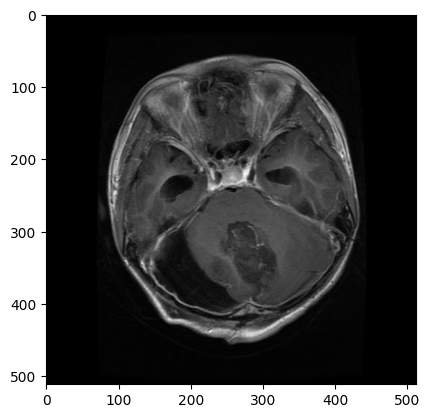

In [15]:
import matplotlib.pyplot as plt


img=imread('/content/drive/MyDrive/Braintumor/Testing/glioma/Te-glTr_0000.jpg')

plt.imshow(img)

In [16]:
img=resize(img,(150,150,1))

img.shape

(150, 150, 1)

In [17]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [18]:
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 197ms/step


array([[2.2194553e-03, 4.8817610e-03, 9.9266386e-01, 2.3488072e-04]],
      dtype=float32)

In [19]:
Categories=['notumor', 'meningioma', 'glioma', 'pituitary']

In [20]:
ind=np.argmax(y_new)
ind

print(Categories[ind])

glioma
